In [1]:
import pandas
import seaborn
import sklearn.preprocessing

%matplotlib inline

In [2]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Instructions

- Read both training and test data from CSV files
- Then, identify which columns are numerical and which columns are categorical

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
id,,,,,,,,,,,,,
258,45.0,yes,66.0,yes,25.0,no,233000.00,0.80,135.0,NaN,no,230.0,no
37,82.0,yes,855.0,yes,50.0,yes,321000.00,1.00,145.0,female,no,30.0,yes
97,70.0,yes,59.0,no,60.0,no,255000.00,1.10,136.0,female,no,85.0,no
191,64.0,yes,62.0,no,60.0,no,309000.00,1.50,135.0,female,no,174.0,no
135,75.0,no,582.0,no,40.0,no,263358.03,1.18,137.0,male,no,107.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,55.0,no,572.0,yes,35.0,no,231000.00,0.80,143.0,female,no,215.0,no
192,50.0,yes,121.0,yes,40.0,no,260000.00,0.70,130.0,male,no,175.0,no
117,85.0,yes,102.0,no,60.0,no,507000.00,3.20,138.0,female,no,94.0,no


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
id,,,,,,,,,,,,,
206,40.000,yes,101.0,no,40.0,no,226000.0,0.8,141.0,female,no,187.0,no
188,60.667,yes,151.0,yes,40.0,yes,201000.0,1.0,136.0,female,no,172.0,no
12,45.000,yes,981.0,no,30.0,no,136000.0,1.1,137.0,male,no,11.0,yes
219,55.000,no,582.0,yes,35.0,yes,371000.0,0.7,140.0,female,no,197.0,no
237,70.000,no,232.0,no,30.0,no,173000.0,1.2,132.0,male,no,210.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,52.000,yes,58.0,no,35.0,no,277000.0,1.4,136.0,female,no,120.0,no
226,58.000,yes,57.0,no,25.0,no,189000.0,1.3,132.0,male,yes,205.0,no
272,67.000,no,213.0,no,38.0,no,215000.0,1.2,133.0,female,no,245.0,no


# Instructions

- Besides manual inspection, you may use `.dtypes` to roughly see the data types
- Now, use `.unique()` on each **categorical** feature column to see possible values
- Now, use `.describe()` on each **numerical** feature column(s) to see descriptive statistics
- Assess whether the data is balance or imbalance
  Hint: use `.value_counts()` on the appropriate column

age                         float64
anaemia                      object
creatinine_phosphokinase    float64
diabetes                     object
ejection_fraction           float64
high_blood_pressure          object
platelets                   float64
serum_creatinine            float64
serum_sodium                float64
sex                          object
smoking                      object
time                        float64
death_event                  object
dtype: object

anaemia               2 ['yes' 'no']
diabetes              2 ['yes' 'no']
high_blood_pressure   2 ['no' 'yes']
sex                   3 [nan 'female' 'male']
smoking               2 ['no' 'yes']
death_event           2 ['no' 'yes']


,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,224.000000,223.000000,224.000000,223.000000,224.000000,223.000000,224.000000
mean,60.971728,567.569507,38.040179,267072.585247,1.361562,136.506726,129.066964
std,11.702196,974.925155,11.591059,100944.412546,0.942147,4.632309,76.759598
min,40.000000,23.000000,14.000000,25100.000000,0.500000,113.000000,4.000000
25%,50.750000,116.500000,30.000000,217000.000000,0.900000,134.000000,73.750000
50%,60.000000,249.000000,38.000000,262000.000000,1.100000,137.000000,114.000000
75%,70.000000,582.000000,45.000000,304500.000000,1.425000,140.000000,197.750000
max,94.000000,7861.000000,62.000000,850000.000000,9.400000,148.000000,280.000000


no     155
yes     69
Name: death_event, dtype: int64

no     48
yes    26
Name: death_event, dtype: int64

# Instructions
- Use appropriate plots to visualize all the features in the training data based on class conditional perspective
  - Visualze categorical features using `seaborn.countplot`. This includes the label.
  - Visualze numerical features using `seaborn.histplot`. 
- Study the features from the visualizations created

<Axes: xlabel='count', ylabel='death_event'>

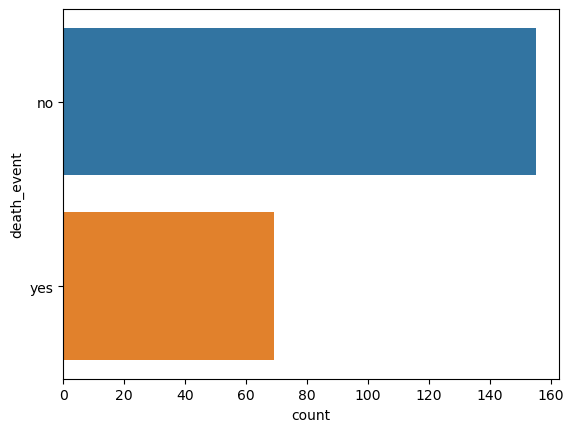

<Axes: xlabel='count', ylabel='death_event'>

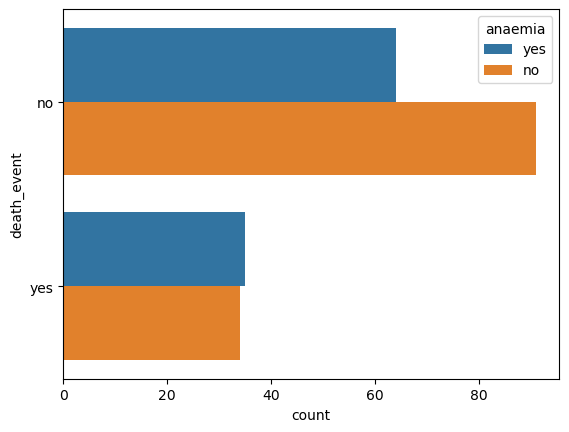

<Axes: xlabel='age', ylabel='Count'>

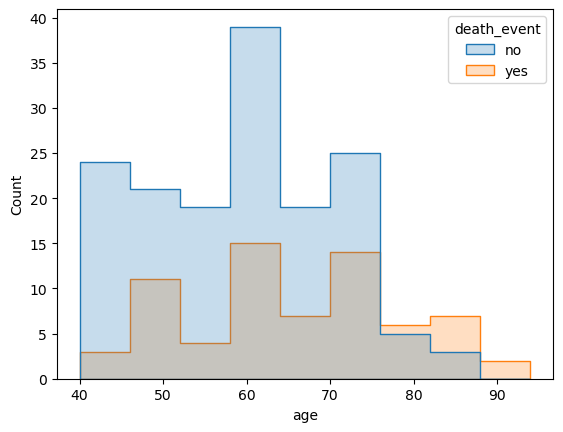

<Axes: xlabel='creatinine_phosphokinase', ylabel='Count'>

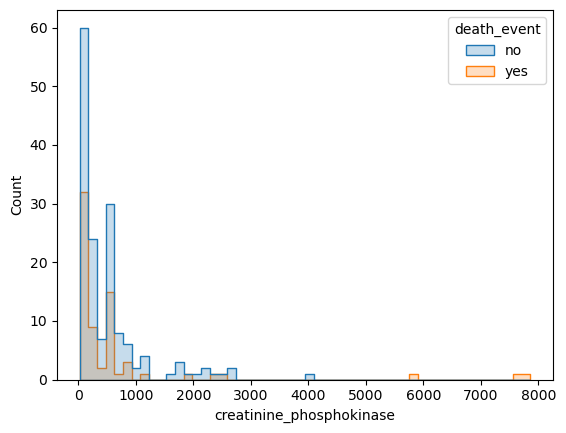

# Instructions
- Investigate whether the dataset contains any missing data

age                         0
anaemia                     0
creatinine_phosphokinase    1
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   1
serum_creatinine            0
serum_sodium                1
sex                         1
smoking                     0
time                        0
death_event                 0
dtype: int64

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 1
dtype: int64

# Instructions
- Use `.dropna()` to discard all missing data from datasets
- Investigate whether there are still any missing data in datasets after using the `.dropna()`

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64

# Instructions
- Now, preprocess the data before model training
- First, convert categorical features to numerical features
- Use `sklearn.preprocessing.OrdinalEncoder` to create an ordinal encoder, then fit using the training data

OrdinalEncoder()

OrdinalEncoder()

[array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object)]

,anaemia,diabetes,high_blood_pressure,sex,smoking,death_event
id,,,,,,
37,1.0,1.0,1.0,0.0,0.0,1.0
97,1.0,0.0,0.0,0.0,0.0,0.0
191,1.0,0.0,0.0,0.0,0.0,0.0
135,0.0,0.0,0.0,1.0,0.0,0.0
118,1.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
195,1.0,0.0,0.0,1.0,0.0,1.0
251,0.0,1.0,0.0,0.0,0.0,0.0
192,1.0,1.0,0.0,1.0,0.0,0.0


,anaemia,diabetes,high_blood_pressure,sex,smoking,death_event
id,,,,,,
206,1.0,0.0,0.0,0.0,0.0,0.0
188,1.0,1.0,1.0,0.0,0.0,0.0
12,1.0,0.0,0.0,1.0,0.0,1.0
219,0.0,1.0,1.0,0.0,0.0,0.0
237,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
156,1.0,0.0,0.0,0.0,0.0,0.0
226,1.0,0.0,0.0,1.0,1.0,0.0
272,0.0,0.0,0.0,0.0,0.0,0.0


# Instructions
- Use `.join` to reconstruct the processed training and test data

,anaemia,diabetes,high_blood_pressure,sex,smoking,death_event,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
id,,,,,,,,,,,,,
37,1.0,1.0,1.0,0.0,0.0,1.0,82.0,855.0,50.0,321000.00,1.00,145.0,30.0
97,1.0,0.0,0.0,0.0,0.0,0.0,70.0,59.0,60.0,255000.00,1.10,136.0,85.0
191,1.0,0.0,0.0,0.0,0.0,0.0,64.0,62.0,60.0,309000.00,1.50,135.0,174.0
135,0.0,0.0,0.0,1.0,0.0,0.0,75.0,582.0,40.0,263358.03,1.18,137.0,107.0
118,1.0,1.0,1.0,0.0,0.0,0.0,65.0,113.0,60.0,203000.00,0.90,140.0,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.0,0.0,0.0,1.0,0.0,1.0,77.0,418.0,45.0,223000.00,1.80,145.0,180.0
251,0.0,1.0,0.0,0.0,0.0,0.0,55.0,572.0,35.0,231000.00,0.80,143.0,215.0
192,1.0,1.0,0.0,1.0,0.0,0.0,50.0,121.0,40.0,260000.00,0.70,130.0,175.0


,anaemia,diabetes,high_blood_pressure,sex,smoking,death_event,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
id,,,,,,,,,,,,,
206,1.0,0.0,0.0,0.0,0.0,0.0,40.000,101.0,40.0,226000.0,0.8,141.0,187.0
188,1.0,1.0,1.0,0.0,0.0,0.0,60.667,151.0,40.0,201000.0,1.0,136.0,172.0
12,1.0,0.0,0.0,1.0,0.0,1.0,45.000,981.0,30.0,136000.0,1.1,137.0,11.0
219,0.0,1.0,1.0,0.0,0.0,0.0,55.000,582.0,35.0,371000.0,0.7,140.0,197.0
237,0.0,0.0,0.0,1.0,0.0,0.0,70.000,232.0,30.0,173000.0,1.2,132.0,210.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.0,0.0,0.0,0.0,0.0,0.0,52.000,58.0,35.0,277000.0,1.4,136.0,120.0
226,1.0,0.0,0.0,1.0,1.0,0.0,58.000,57.0,25.0,189000.0,1.3,132.0,205.0
272,0.0,0.0,0.0,0.0,0.0,0.0,67.000,213.0,38.0,215000.0,1.2,133.0,245.0


# Instructions
- Manually choose a subset of features that you think are most relevant to the classification task
  - Hint: visualization on various features should help
- The prediction accuracy will not be graded, so, take this opportunity to learn
  - Too many features are likely to include irrelevant features
  - Too few features are likely to lower predictive power
- Create `pandas.DataFrames` that contain only those relevant features for training data and test data respectively

# Instructions
- Write the train data set to `./data/features.train.csv`
- Write the test data set to `./data/features.test.csv`
- **Verify that the files with only the selected features are written**